In [55]:
data <- read.table("/Users/yao/Desktop/stat201b/HW/HW6/glass.dat")
x <- data$RI

In [56]:
##CV risk estimator
jhat <- function(m, x){
    breaks <- seq(min(x), max(x), length = m+1)
    h <- (breaks[2]-breaks[1])
    n <- length(x)
    phat <- hist(x, breaks = breaks, plot = FALSE)$counts/n
    return(2/((n-1)*h) - (n+1)/((n-1)*h)*sum(phat^2))
}

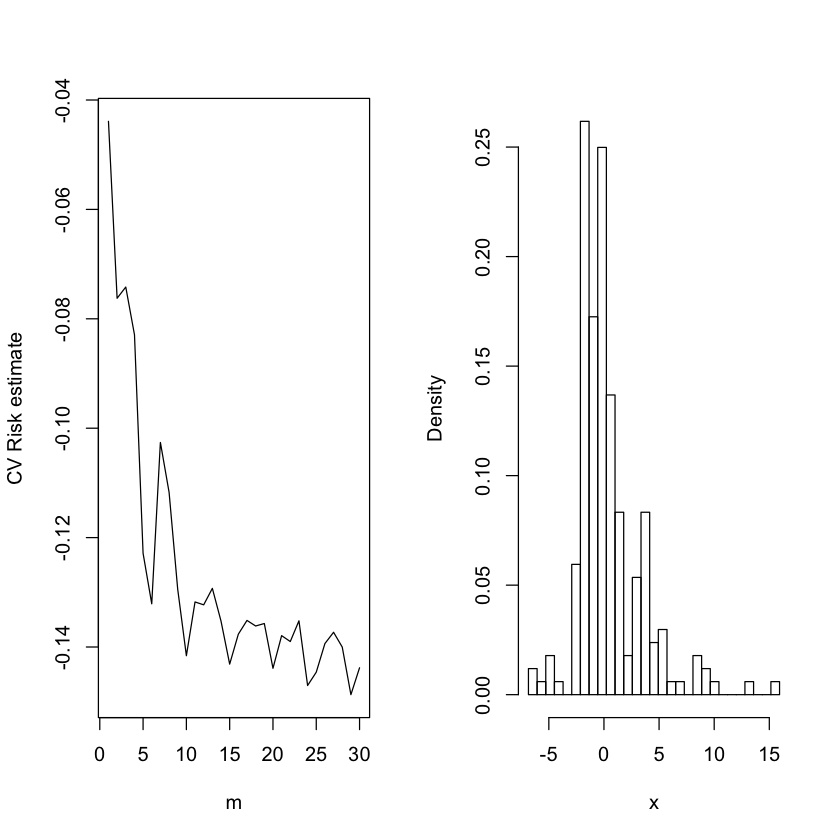

In [57]:
mvals <- 1:30
risk <- sapply(mvals, jhat, x = x)
par(mfrow=c(1,2))
plot(mvals, risk, type='l', xlab = 'm', ylab="CV Risk estimate")
mopt <- mvals[risk==min(risk)]
hist(x, breaks = seq(min(x), max(x), length = mopt+1), prob=TRUE, main='')

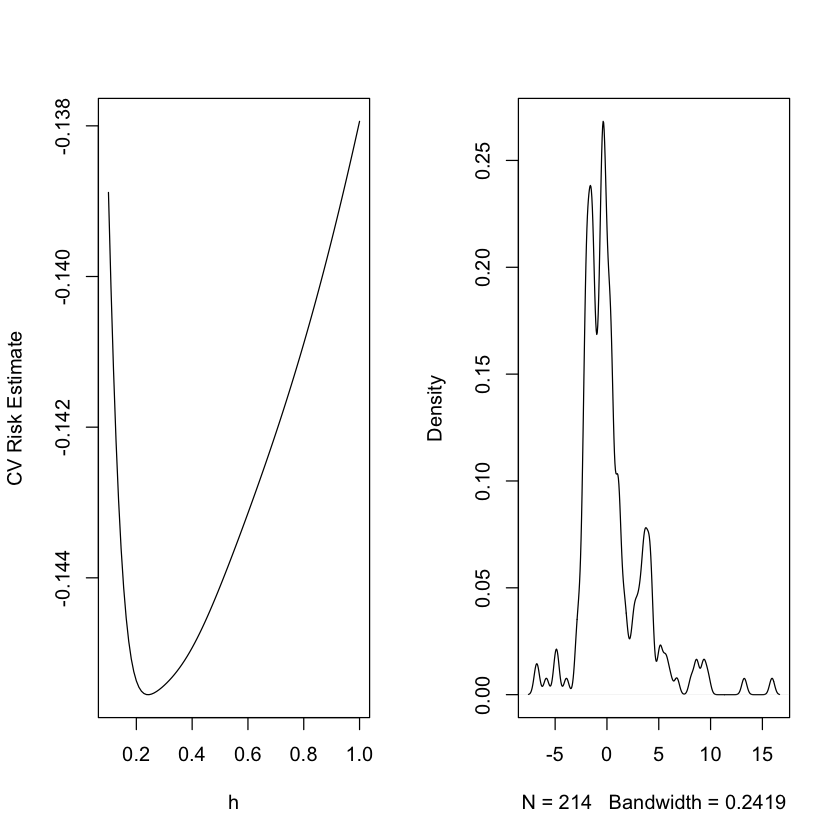

In [58]:
jhat <- function(h, x) {
    n <- length(x)
    crossmat <- outer(x, x, '-')/h
    kstar <- dnorm(crossmat, sd = sqrt(2)) - 2*dnorm(crossmat)
    return(sum(kstar)/(h*n^2) + 2*dnorm(0)/(n*h))
}

hseq <- seq(0.1, 1, length=100)
risk <- sapply(hseq, jhat, x = x)
par(mfrow=c(1,2))
plot(hseq, risk, type='l', xlab="h", ylab="CV Risk Estimate")
hopt <- optimize(jhat, lower=0.1, upper=1, x=x)$minimum
plot(density(x, bw=hopt), main="")